In [2]:
import torch
import torch.nn as nn
from torchvision import models
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, random_split, Dataset
from torchvision.datasets import ImageFolder
import torch.optim as optim
import numpy as np

In [3]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.datasets import ImageFolder

# Define the transformation pipeline
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Initialize the datasets
train_dataset = ImageFolder(root='C:\\Users\\Chiara Falcone_2\\Desktop\\Computer Vision\\Progetto\\dataset\\training', transform=transform)
validation_dataset = ImageFolder(root='C:\\Users\\Chiara Falcone_2\\Desktop\\Computer Vision\\Progetto\\dataset\\validation', transform=transform)

# Initialize the data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(validation_dataset, batch_size=32, shuffle=False)


In [4]:
cud = torch.cuda.is_available()
print(cud)
from torchvision import models


True


In [5]:

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
net = models.resnet18(weights=True)
net = net.cuda() if device else net
net

num_ftrs = net.fc.in_features
net.fc = nn.Linear(num_ftrs, 3)

c:\Users\Chiara Falcone_2\anaconda3\envs\MLP\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [6]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.0001, momentum=0.9)

def accuracy(out, labels):
    _,pred = torch.max(out, dim=1)
    return torch.sum(pred==labels).item()

use_cuda = torch.cuda.is_available()
num_ftrs = net.fc.in_features
net.fc = nn.Linear(num_ftrs, 3)
net.fc = net.fc.cuda() if use_cuda else net.fc

print(net.fc)

Linear(in_features=512, out_features=3, bias=True)


In [7]:
import time
n_epochs = 5
print_every = 10
valid_loss_min = np.Inf
val_loss = []
val_acc = []
train_loss = []
train_acc = []
total_step = len(train_loader)
print(total_step)
for epoch in range(1, n_epochs+1):
    running_loss = 0.0
    correct = 0
    total=0
    print(f'Epoch {epoch}\n')
    for batch_idx, (data_, target_) in enumerate(train_loader):
        data_, target_ = data_.to(device), target_.to(device)
        optimizer.zero_grad()
        
        outputs = net(data_)
        loss = criterion(outputs, target_)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _,pred = torch.max(outputs, dim=1)
        correct += torch.sum(pred==target_).item()
        total += target_.size(0)
        if (batch_idx) % 20 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch, n_epochs, batch_idx, total_step, loss.item()))
    train_acc.append(100 * correct / total)
    train_loss.append(running_loss/total_step)
    print(f'\ntrain-loss: {np.mean(train_loss):.4f}, train-acc: {(100 * correct/total):.4f}')
    batch_loss = 0
    total_t=0
    correct_t=0
    with torch.no_grad():
        net.eval()
        for data_t, target_t in (val_loader):
            data_t, target_t = data_t.to(device), target_t.to(device)
            outputs_t = net(data_t)
            loss_t = criterion(outputs_t, target_t)
            batch_loss += loss_t.item()
            _,pred_t = torch.max(outputs_t, dim=1)
            correct_t += torch.sum(pred_t==target_t).item()
            total_t += target_t.size(0)
        val_acc.append(100 * correct_t/total_t)
        val_loss.append(batch_loss/len(val_loader))
        network_learned = batch_loss < valid_loss_min
        print(f'validation loss: {np.mean(val_loss):.4f}, validation acc: {(100 * correct_t/total_t):.4f}\n')
        timestr = time.strftime("%Y%m%d_%H%M%S")
        
        if network_learned:
            valid_loss_min = batch_loss
            torch.save(net, 'df_model_2.pt')
            
            
            print('Improvement-Detected, save-model')
    net.train()

591
Epoch 1

Epoch [1/5], Step [0/591], Loss: 1.3820
Epoch [1/5], Step [20/591], Loss: 1.6472
Epoch [1/5], Step [40/591], Loss: 1.3327
Epoch [1/5], Step [60/591], Loss: 1.4815
Epoch [1/5], Step [80/591], Loss: 1.2871
Epoch [1/5], Step [100/591], Loss: 1.4688
Epoch [1/5], Step [120/591], Loss: 1.3984
Epoch [1/5], Step [140/591], Loss: 1.0378
Epoch [1/5], Step [160/591], Loss: 1.3096
Epoch [1/5], Step [180/591], Loss: 0.9924
Epoch [1/5], Step [200/591], Loss: 1.0355
Epoch [1/5], Step [220/591], Loss: 0.7469
Epoch [1/5], Step [240/591], Loss: 0.9013
Epoch [1/5], Step [260/591], Loss: 0.7336
Epoch [1/5], Step [280/591], Loss: 0.7760
Epoch [1/5], Step [300/591], Loss: 0.5813
Epoch [1/5], Step [320/591], Loss: 0.6666
Epoch [1/5], Step [340/591], Loss: 0.4722
Epoch [1/5], Step [360/591], Loss: 0.3921
Epoch [1/5], Step [380/591], Loss: 0.3746
Epoch [1/5], Step [400/591], Loss: 0.3456
Epoch [1/5], Step [420/591], Loss: 0.4630
Epoch [1/5], Step [440/591], Loss: 0.3261
Epoch [1/5], Step [460/591]

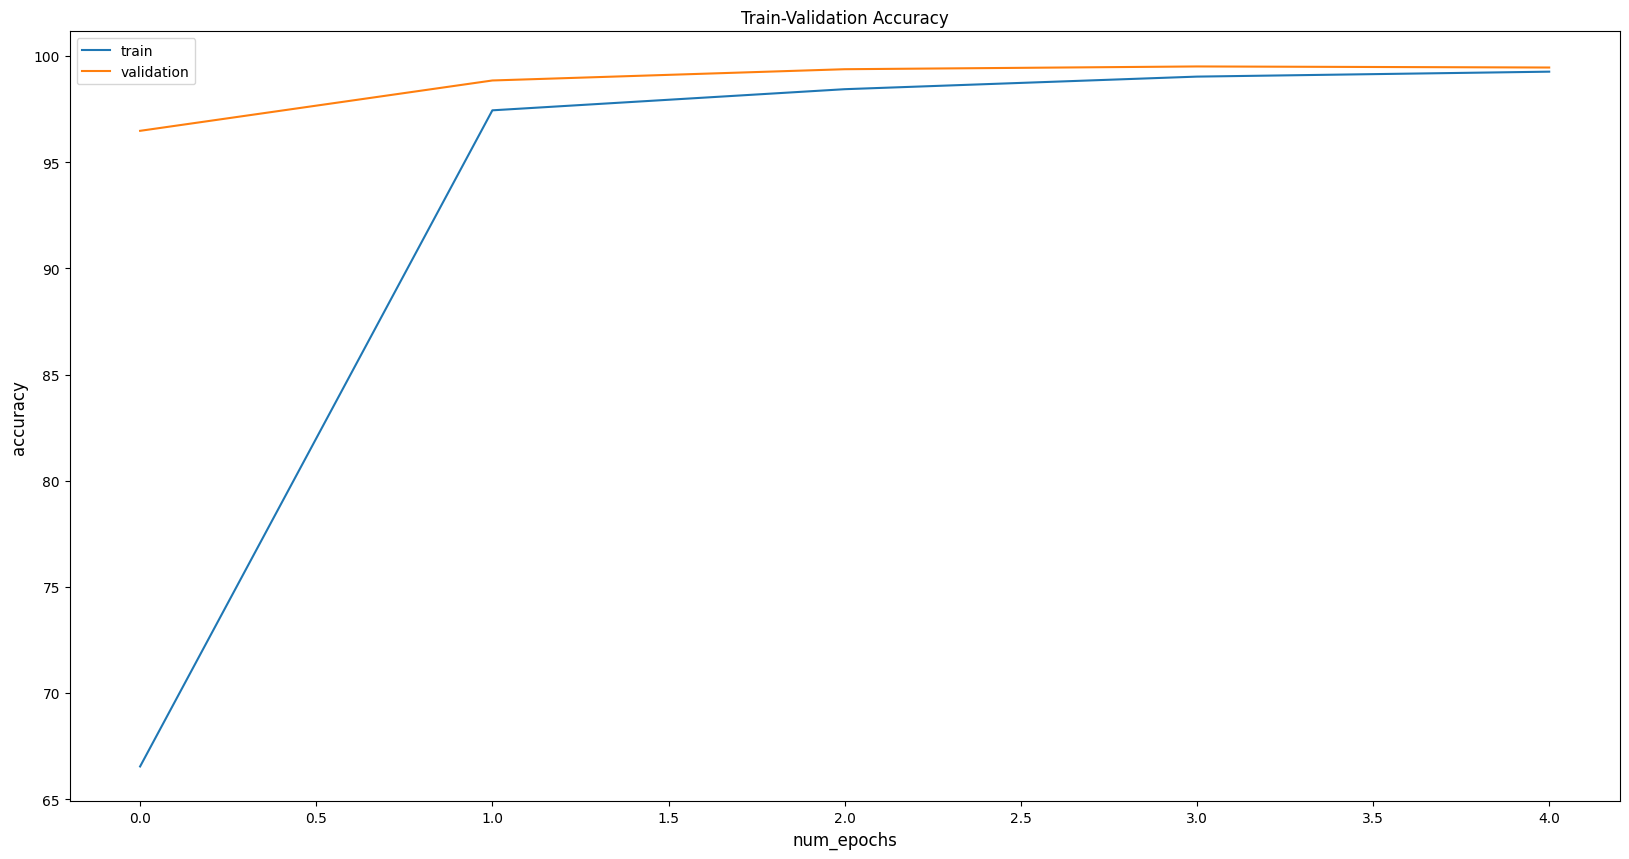

In [8]:
import os

os.environ['KMP_DUPLICATE_LIB_OK']='True'
import matplotlib.pyplot as plt


fig = plt.figure(figsize=(20,10))
plt.title("Train-Validation Accuracy")
plt.plot(train_acc, label='train')
plt.plot(val_acc, label='validation')
plt.xlabel('num_epochs', fontsize=12)
plt.ylabel('accuracy', fontsize=12)
plt.legend(loc='best')

